# DECISION TREE CLASSIFICATION

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [3]:
data = pd.read_csv(r'C:\Users\User\juypter\files\Social_Network_Ads.csv')
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

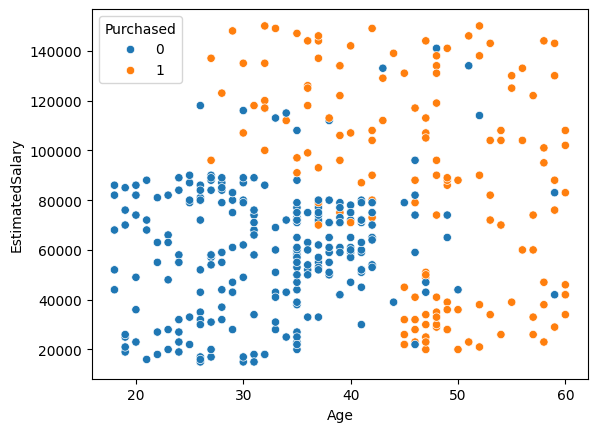

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="Age", y="EstimatedSalary", data=data,hue="Purchased")
plt.show()

In [5]:
x = data.iloc[:,:-1]
x.ndim
y = data["Purchased"]

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x)
x =pd.DataFrame(sc.transform(x),columns=x.columns)
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x, y)

DecisionTreeClassifier()

In [9]:
dt.score(x_test,y_test)*100,dt.score(x_train,y_train)*100

(100.0, 99.375)

In [10]:
dt.predict([[35,20000]])

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

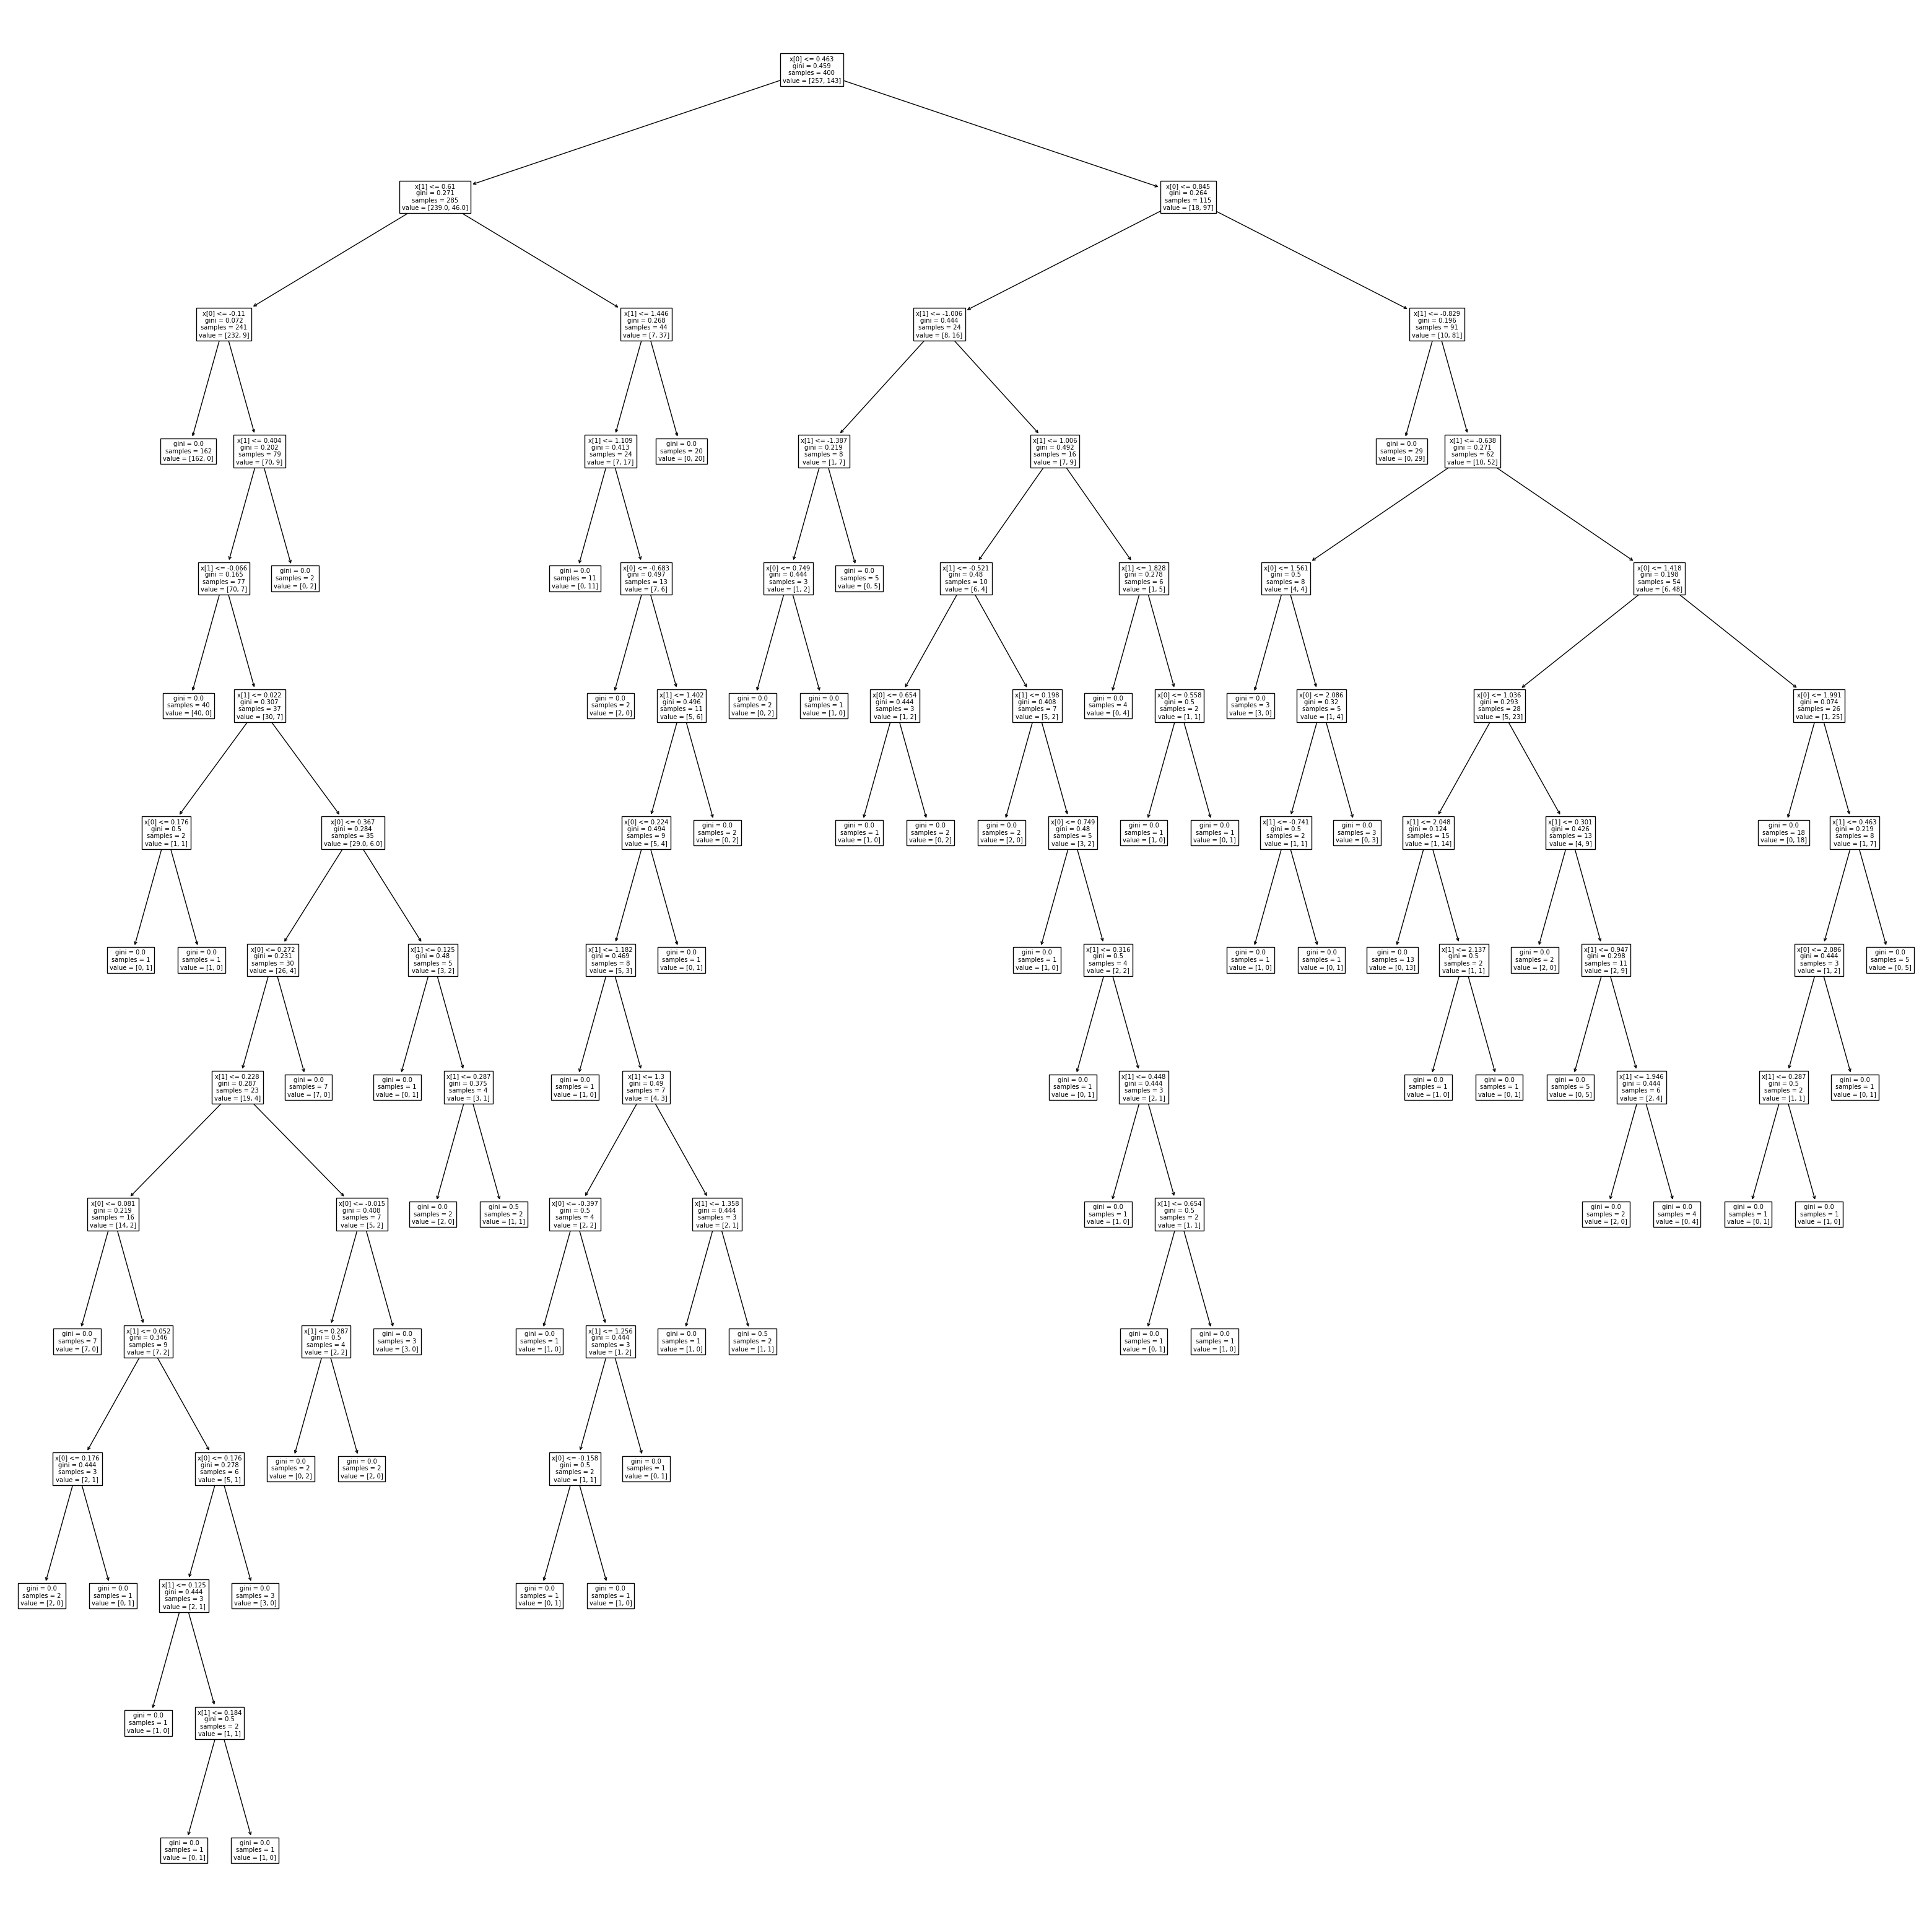

In [11]:
from sklearn.tree import plot_tree
plt.figure(figsize=(40, 40))
plot_tree(dt)

plt.savefig("B_31_tree.jpg")
plt.show()

# by using entropy

In [41]:
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier(criterion='entropy',max_depth=3)
dt1.fit(x, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [23]:
dt1.score(x_test, y_test)*100

100.0

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


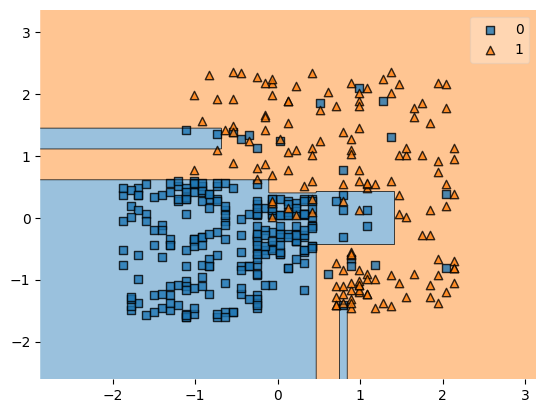

In [42]:
import matplotlib.pyplot as plt
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)
plt.show()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


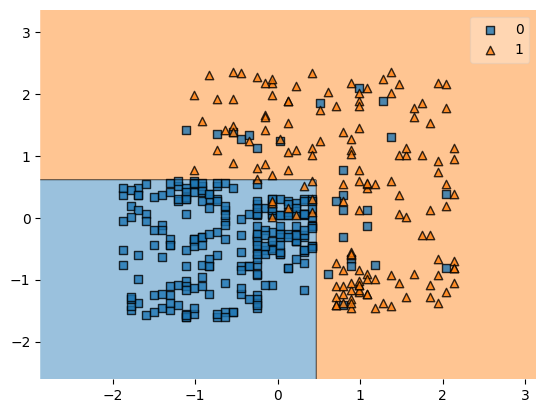

In [43]:
import matplotlib.pyplot as plt
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt1)
plt.show()

In [26]:
dt.score(x_train,y_train)*100

93.125

# PRE AND POST PRUNING

In [44]:
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier(criterion='entropy',max_depth=3)
dt1.fit(x, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [45]:
dt.score(x_test, y_test)*100

96.25

In [46]:
dt.score(x_train,y_train)*100

93.125

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


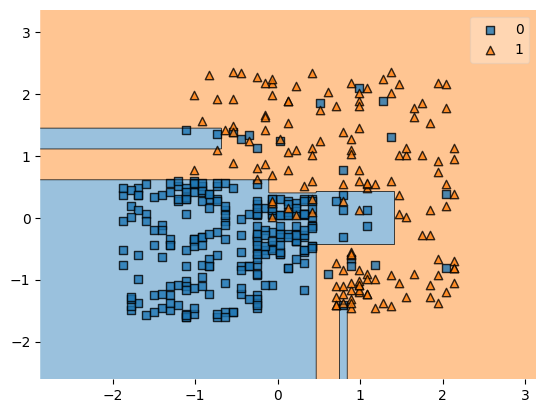

In [47]:
import matplotlib.pyplot as plt
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)
plt.show()

# POST PRUNING

In [48]:
from sklearn.tree import DecisionTreeClassifier
for i in range(1, 20):
    dt2=DecisionTreeClassifier(max_depth=i, random_state=1)
    dt2.fit(x_train, y_train)
    print(dt2.score(x_test, y_test),dt2.score(x_test,y_test),i)

0.9 0.9 1
0.9125 0.9125 2
0.9125 0.9125 3
0.9125 0.9125 4
0.9 0.9 5
0.8625 0.8625 6
0.85 0.85 7
0.85 0.85 8
0.85 0.85 9
0.85 0.85 10
0.8375 0.8375 11
0.8375 0.8375 12
0.8375 0.8375 13
0.8375 0.8375 14
0.8375 0.8375 15
0.8375 0.8375 16
0.8375 0.8375 17
0.8375 0.8375 18
0.8375 0.8375 19
